In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread("python/monkey.jpg")

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [5]:
orb = cv2.ORB_create(50)

In [6]:
kp, des = orb.detectAndCompute(gray, None)

In [7]:
result = cv2.drawKeypoints(gray, kp, None, flags=None)

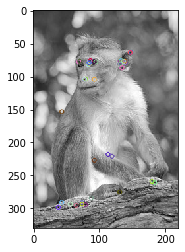

In [8]:
plt.imshow(result)

In [9]:
img2 = cv2.imread("python/monkey_distorted.jpg")

In [10]:
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [11]:
kp2, des2 = orb.detectAndCompute(gray2, None)

In [12]:
result2 = cv2.drawKeypoints(gray2, kp, None, flags=None)

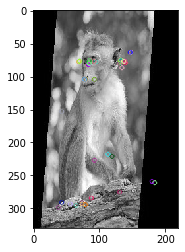

In [13]:
plt.imshow(result2)

In [14]:
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

In [15]:
matches = matcher.match(des, des2, None)

In [16]:
matches = sorted(matches, key = lambda x:x.distance)

In [17]:
result3 = cv2.drawMatches(img, kp, img2, kp2, matches[:10], None)

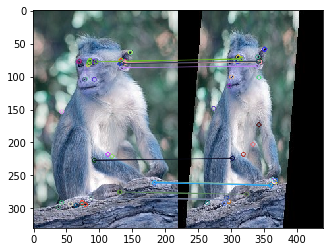

In [18]:
plt.imshow(result3)

In [20]:
point1 = np.zeros((len(matches), 2), dtype=np.float32)
point2 = np.zeros((len(matches), 2), dtype=np.float32)

In [24]:
for i, match in enumerate(matches):
    point1[i,:] = kp[match.queryIdx].pt
    point2[i,:] = kp2[match.queryIdx].pt

In [28]:
h, mask = cv2.findHomography(point1, point2, cv2.RANSAC)

In [29]:
height, width, channel = img2.shape

In [30]:
img1Reg = cv2.warpPerspective(img, h, (width, height))

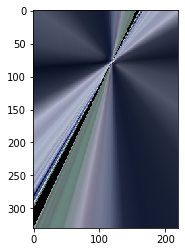

In [31]:
plt.imshow(img1Reg)